In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

In [12]:
data = load_diabetes()
data.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [14]:
features = pd.DataFrame(data['data'], columns=data['feature_names'])
target = pd.Series(data['target'], name='target')
features.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [16]:
X = features['bmi'].values.reshape(-1,1)
y = target.values.reshape(-1,1)

In [17]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
model.intercept_

array([152.13348416])

In [19]:
model.coef_

array([[949.43526038]])

In [21]:
calc_pred = model.intercept_ + (X*model.coef_)

pred = model.predict(X)

(calc_pred == pred).all()

True

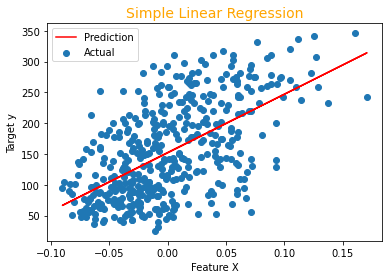

In [22]:
plt.scatter(X,y, label='Actual')
plt.plot(X,pred, '-r', label='Prediction')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('Simple Linear Regression', color='orange', size=14)
plt.legend()
plt.show()

In [23]:
#Mean squared error
mean_squared_error(y, pred)

3890.4565854612724

In [25]:
#R-squared error
model.score(X,y)

0.3439237602253803